In [2]:
import sys
sys.path.append(r'E:\Users\rohan\Documents\GitHub\AdamES')

In [3]:
from es import ES
from adames import AdamES
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

In [53]:
class Environment(object):
  def f1(self, x1, x2):
    return (x1**4) + (x1*x2) + (0.5*(x2**2))

  def f2(self, x):
    return x**2

  def matyas(self, x1, x2):
    return 0.26*((x1**2) + (x2**2)) - 0.48*x1*x2

  def ackley(self, x1, x2):
    return -20 * np.exp(-0.2*np.sqrt(0.5*((x1**2) + (x2**2)))) - np.exp(0.5*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))) + np.exp(1) + 20

  def sphere(self, x1, x2):
    return (x1 ** 2) + (x2 ** 2)

  def step(self, features):
    return _, -self.sphere(features[0], features[1]), _

In [48]:
env = Environment()
starting_point = [5, 5]
action_ranges = [None, None]
num_actions = len(action_ranges)
monte_carlo_iterations = 1000
num_episodes = 500
batch_size = 10

alphas_es = np.arange(0.015, 0.515, 0.005)
alphas_adames = np.arange(0.03, 1.03, 0.01)

sigmas_es = list(reversed(np.arange(0.1, 1.5, 0.1)))
sigmas_adames = list(reversed(np.arange(0.01, 0.165, 0.015)))

print(len(alphas_es), len(alphas_adames))
print(len(sigmas_es), len(sigmas_adames))

100 100
14 11


In [49]:
converged_es = 0
convergence_times_es = np.zeros(len(alphas_es))
steady_state_std_es = np.zeros(len(alphas_es))
for i, alpha in enumerate(alphas_es):  
    agent_es = ES(env=env,
            num_actions=num_actions,
            sigma=0.35,
            alpha=alpha,
            action_ranges=action_ranges,
            global_optimum=0,
    )

    predicted_vars = agent_es.optimize(num_episodes=num_episodes,
                                    batch_size=batch_size,
                                    starting_point=starting_point,
                                    plot=0,
                                    verbose=0)

    convergence_times_es[i] = agent_es.convergence_time
    steady_state_std_es[i] = np.std(agent_es.steady_state_rewards)
    if agent_es.convergence_time > 0:
        converged_es += 1

In [50]:
converged_adames = 0
convergence_times_adames = np.zeros(len(alphas_es))
steady_state_std_adames = np.zeros(len(alphas_es))

for i, alpha in enumerate(alphas_adames):
    agent_adames = AdamES(env=env,
            num_actions=num_actions,
            sigma=0.35,
            alpha=alpha,
            action_ranges=action_ranges,
            global_optimum=0,
    )

    predicted_vars = agent_adames.optimize(num_episodes=num_episodes,
                                    batch_size=batch_size,
                                    starting_point=starting_point,
                                    plot=0,
                                    verbose=0)
    convergence_times_adames[i] = agent_adames.convergence_time
    steady_state_std_adames[i] = np.std(agent_adames.steady_state_rewards)
    if agent_adames.convergence_time > 0:
        converged_adames += 1

Text(0, 0.5, 'Convergence Time')

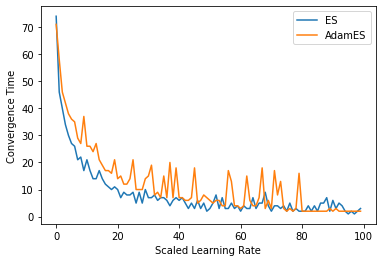

In [51]:
plt.plot(convergence_times_es, label='ES')
plt.plot(convergence_times_adames, label='AdamES')
plt.legend()
plt.xlabel('Scaled Learning Rate')
plt.ylabel('Convergence Time')

Text(0, 0.5, 'Steady State std')

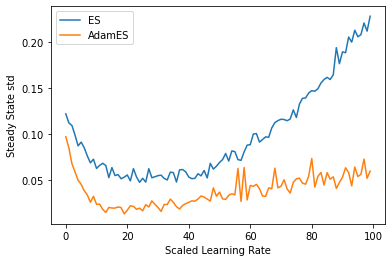

In [52]:
plt.plot(steady_state_std_es, label='ES')
plt.plot(steady_state_std_adames, label='AdamES')
plt.legend()
plt.xlabel('Scaled Learning Rate')
plt.ylabel('Steady State std')

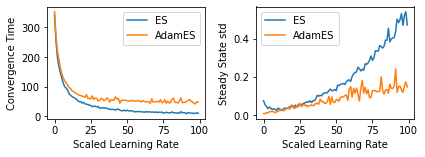

In [41]:
plt.figure
plt.subplot(2, 2, 1)
plt.plot(convergence_times_es, label='ES')
plt.plot(convergence_times_adames, label='AdamES')
plt.legend()
plt.xlabel('Scaled Learning Rate')
plt.ylabel('Convergence Time')
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.plot(steady_state_std_es, label='ES')
plt.plot(steady_state_std_adames, label='AdamES')
plt.legend()
plt.xlabel('Scaled Learning Rate')
plt.ylabel('Steady State std')
plt.tight_layout()